
# SLR to MLR

- Adding more isnt always helpful
    - Model may "over-fit" by becoming too comples
        - Model fits the train set too well
        -  Symptoms: high train accuracy
    - Multi-Colinearity
        - Association between predictor variables
- feature selection becomes an import aspect        

#### Overfitting:

more features cause probelms with generalization causing tremendous drop in accuracy

#### Multi-collinearity

Effect of having related predictors int he multiple l;inear regression model.

### Standardizing

x=(x-min)/std

### Min Max Scaling

x=x-min/max-min

the key aspect while selecting the best model is the trade off between slecting the model explaining the variance best and the model which is fairly simple.

Adjusted R2 = 1- ((1-R2)(N-1))/N-p-1

AIC= n*log(RSS/n)+2p

## Feature Selection

- try all possible combinations(2^p models for p features)
    - time consuming
- manual feature elimination
    - build modle
    - drop least helpful feature
    - drop redundant feature
    - rebuild the model
    
- Automated approach
    - Recursive Feature Elimination
    - forward/backward/stepwise selection based on AIC. Suggested to have a balanced approach, i.e. automated(coarse tuning) and manual(fine tuning)

In [1]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 5242-93A4

 Directory of C:\Users\HP\Desktop\Data Science with ML and DL(Summer Training)

18-06-2024  11:35 AM    <DIR>          .
16-06-2024  09:04 PM    <DIR>          ..
18-06-2024  10:43 AM    <DIR>          .ipynb_checkpoints
10-06-2024  02:22 PM       166,133,370 application_data.csv
08-06-2024  04:35 PM             3,676 Assignment(replaceEnding, mergesort).ipynb
12-06-2024  10:32 AM            26,717 CarPrice_Assignment.csv
08-06-2024  01:57 PM           864,697 Crypto data analysis.ipynb
16-06-2024  08:54 PM    <DIR>          crypto_data
07-06-2024  09:20 PM           168,094 crypto_data.zip
04-06-2024  10:04 AM            21,872 Day1.ipynb
14-06-2024  04:21 PM         1,739,853 Day10.1-11.ipynb
05-06-2024  09:44 AM            34,798 Day2.ipynb
06-06-2024  04:47 PM           580,004 Day3.1.ipynb
07-06-2024  09:58 AM           607,780 Day3.2-4.ipynb
08-06-2024  12:47 PM            84,257 Day4.2.ipynb
06-06-2024  04:47 P

# Assignment 2(Housing Case study)


a real estate comapny that has a dataset containing the prices of properties in the price of the properties in the delhi region.

Essentially, the company wants-
- To identify the variables afeectinh housing prices
- to create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd

In [4]:
hous_df=pd.read_csv("Housing.csv")

In [5]:
hous_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
hous_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
hous_df.shape

(545, 13)

In [8]:
list(hous_df.columns)

['price',
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

In [9]:
hous_df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


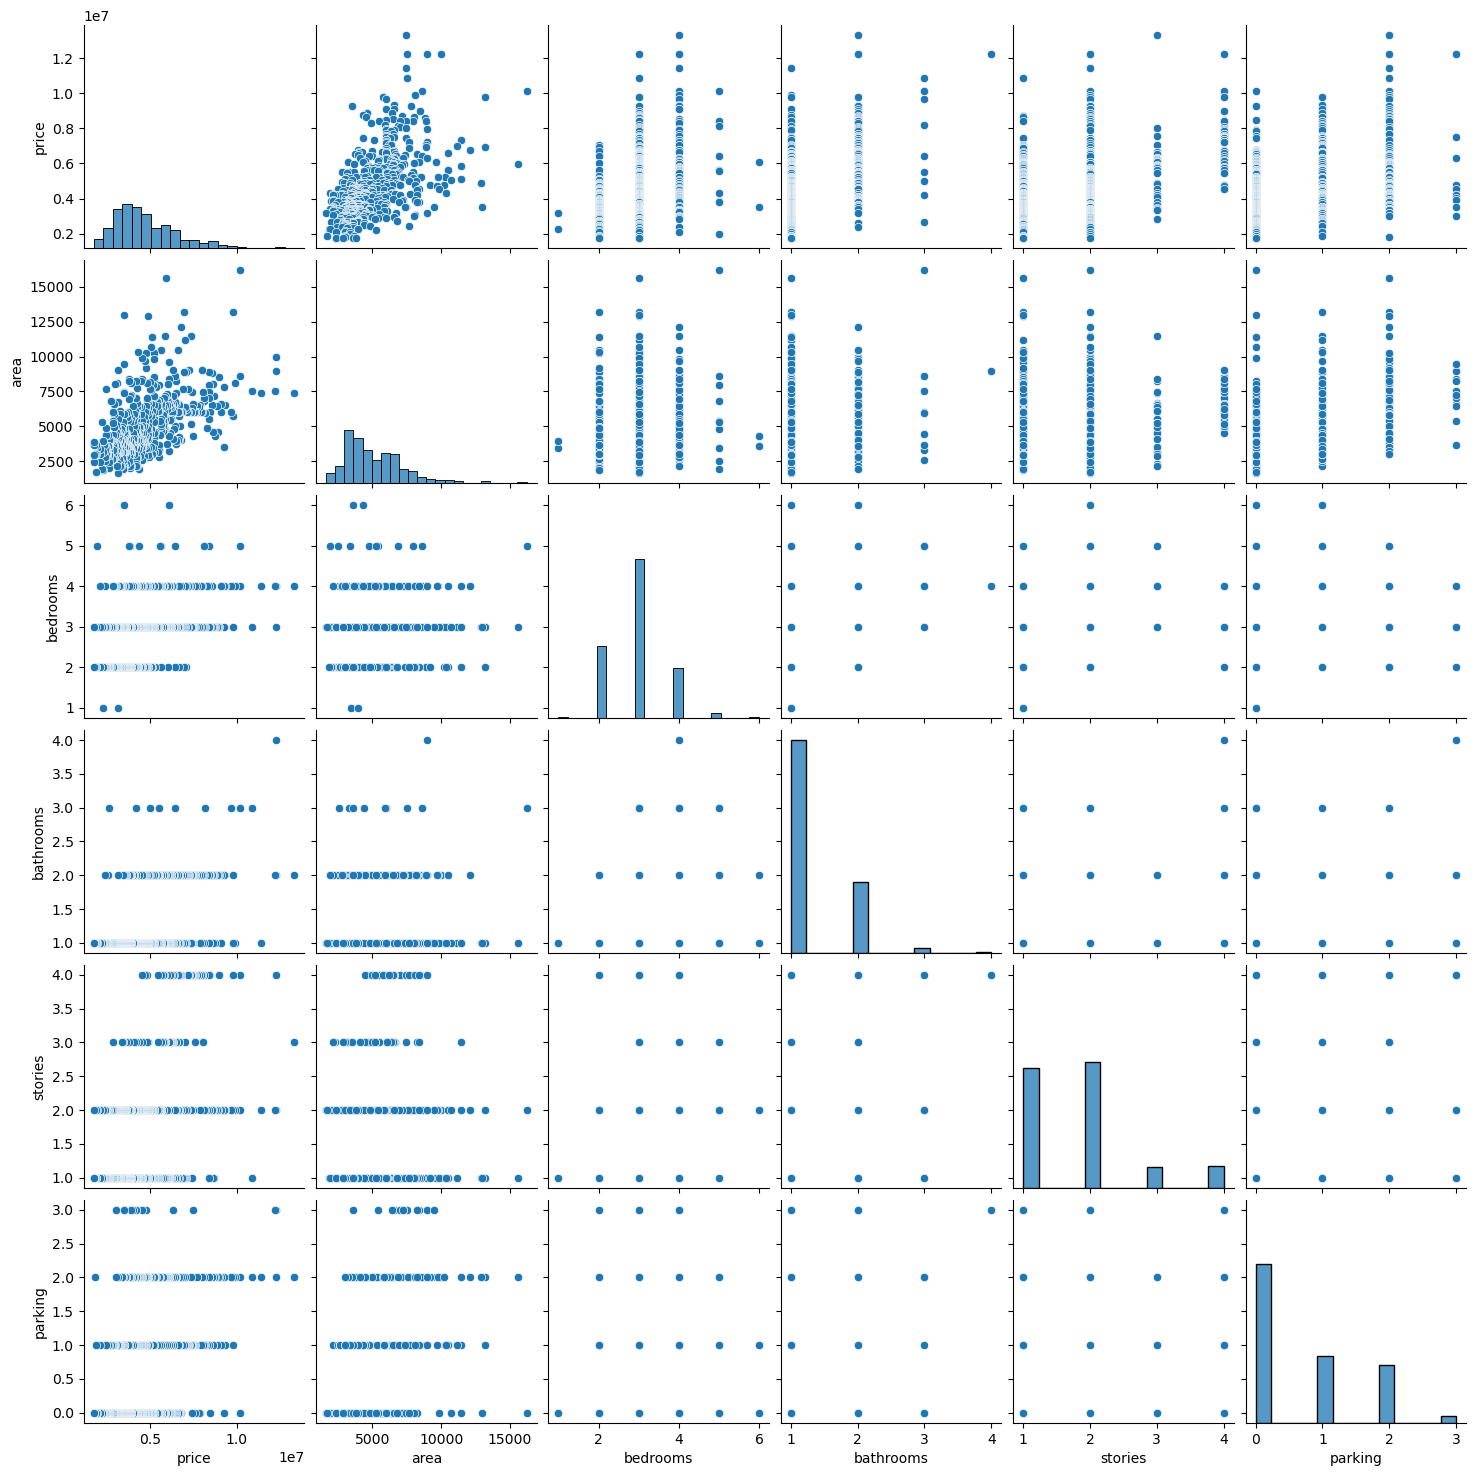

In [11]:
sns.pairplot(hous_df)
plt.show()

<Axes: xlabel='furnishingstatus', ylabel='price'>

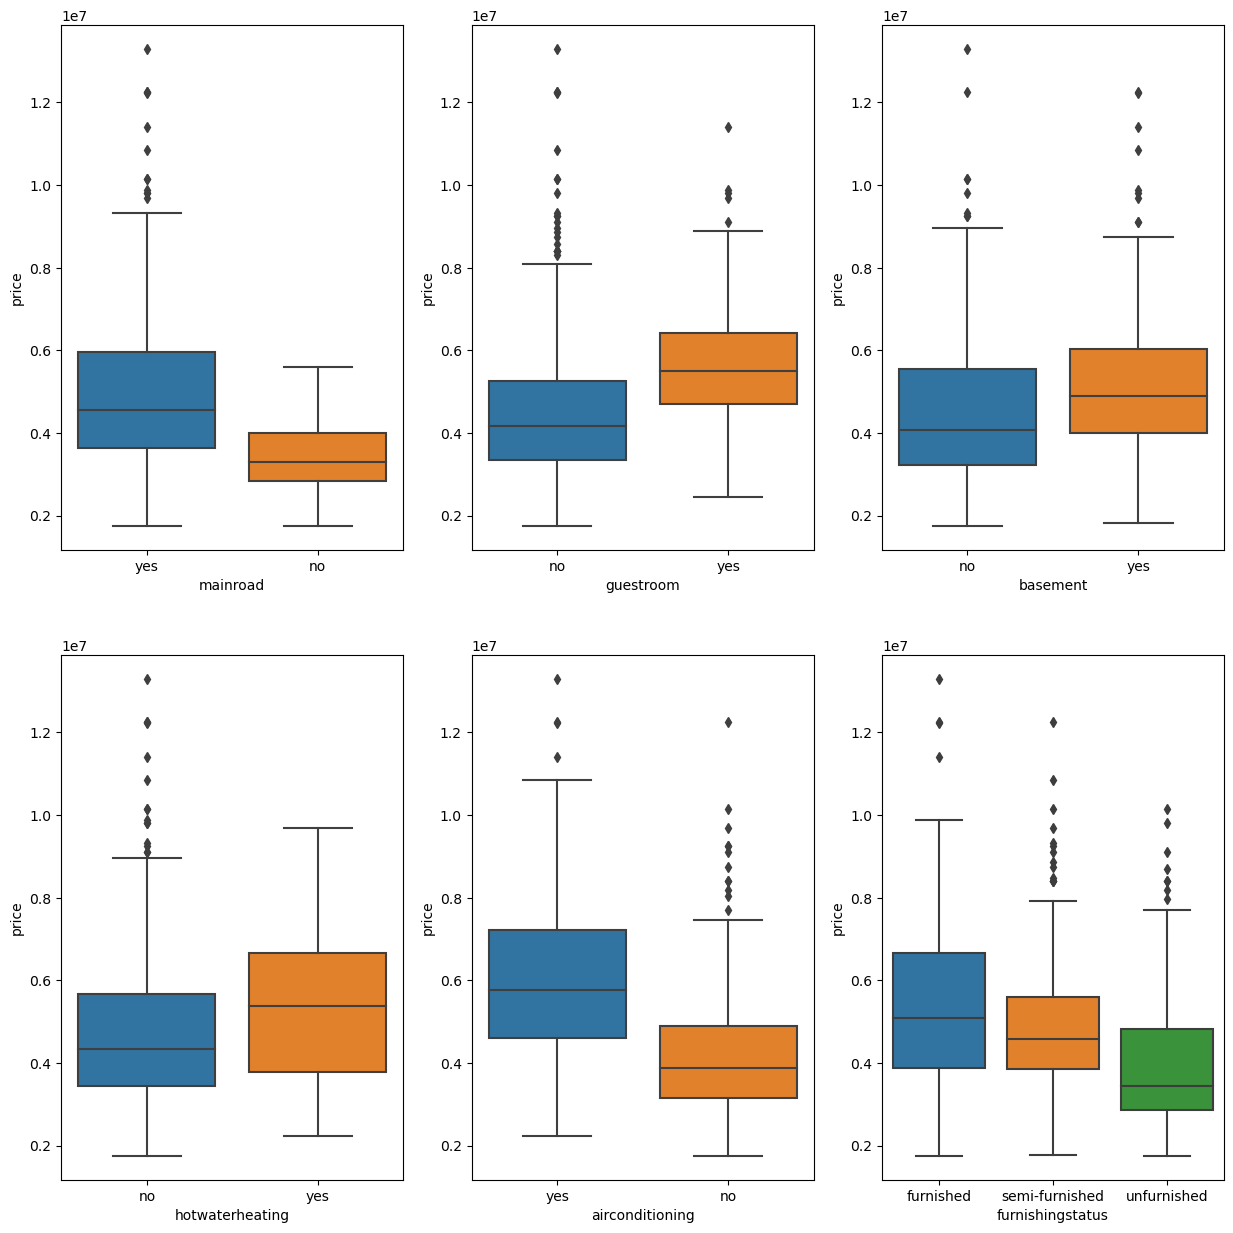

In [12]:
plt.figure(figsize=(15,15))

plt.subplot(2,3,1)
sns.boxplot(x="mainroad",y="price",data=hous_df)
plt.subplot(2,3,2)
sns.boxplot(x="guestroom",y="price",data=hous_df)
plt.subplot(2,3,3)
sns.boxplot(x="basement",y="price",data=hous_df)
plt.subplot(2,3,4)
sns.boxplot(x="hotwaterheating",y="price",data=hous_df)
plt.subplot(2,3,5)
sns.boxplot(x="airconditioning",y="price",data=hous_df)
plt.subplot(2,3,6)
sns.boxplot(x="furnishingstatus",y="price",data=hous_df)

<Axes: xlabel='furnishingstatus', ylabel='price'>

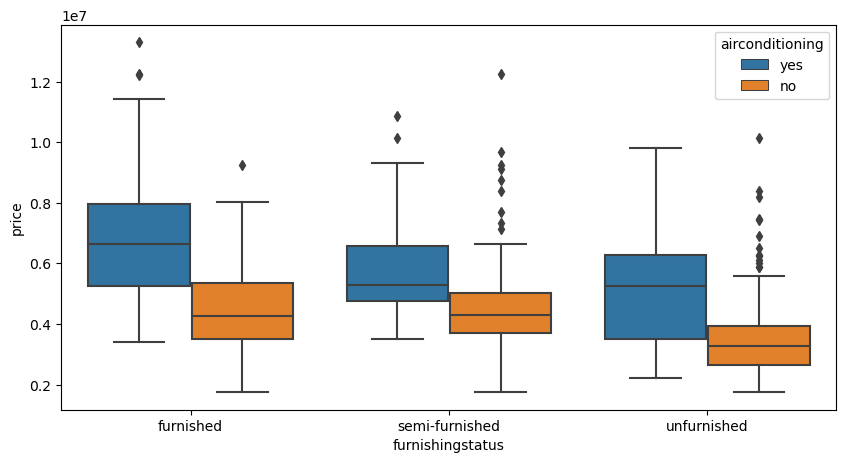

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(x="furnishingstatus",y="price",hue="airconditioning",data=hous_df)

In [14]:
bool_col=["mainroad","basement","guestroom","hotwaterheating","airconditioning","prefarea"]

def binar(x):
    return x.map({"yes":1,"no":0})

hous_df[bool_col]=hous_df[bool_col].apply(binar)

In [15]:
hous_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


hous_df["furnishingstatus"]=hous_df["furnishingstatus"].map({"furnished":1,"semi-furnished":0.5,"unfurnished":0})


In [16]:
status=pd.get_dummies(hous_df["furnishingstatus"], dtype=int)

In [17]:
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [18]:
hous_df=pd.concat([hous_df,status],axis=1)

In [19]:
hous_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished,1,0,0


In [20]:
hous_df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus', 'furnished',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [21]:
hous_df=hous_df.drop(['furnishingstatus'],axis=1)

In [22]:
hous_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


In [23]:
hous_df.isnull().sum()

price              0
area               0
bedrooms           0
bathrooms          0
stories            0
mainroad           0
guestroom          0
basement           0
hotwaterheating    0
airconditioning    0
parking            0
prefarea           0
furnished          0
semi-furnished     0
unfurnished        0
dtype: int64

In [24]:
hous_df=hous_df.drop(['furnished'],axis=1)

In [25]:
hous_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


so semi-funished and unfurnished being the two variable:
- 00 would mean furnished
- 01 would mean unfurnished
- 10 would mean semi-furnished

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
help(np.random)

Help on package numpy.random in numpy:

NAME
    numpy.random

DESCRIPTION
    Random Number Generation
    
    Use ``default_rng()`` to create a `Generator` and call its methods.
    
    =============== =========================================================
    Generator
    --------------- ---------------------------------------------------------
    Generator       Class implementing all of the random number distributions
    default_rng     Default constructor for ``Generator``
    =============== =========================================================
    
    ============================================= ===
    BitGenerator Streams that work with Generator
    --------------------------------------------- ---
    MT19937
    PCG64
    PCG64DXSM
    Philox
    SFC64
    ============================================= ===
    
    ============================================= ===
    Getting entropy to initialize a BitGenerator
    --------------------------------------------

In [86]:
np.random.seed(0)
df_train,df_test=train_test_split(hous_df,train_size=0.7,test_size=0.3,random_state=100)

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [30]:
num_vars=["area","bedrooms","bathrooms","stories","parking","price"]
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [31]:
df_train

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.048485,0.118268,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,0,1
53,0.484848,0.291623,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,1,0
350,0.175758,0.139388,0.2,0.0,0.333333,1,0,0,1,0,0.333333,0,1,0
79,0.424242,0.366420,0.4,0.5,0.666667,1,1,0,0,1,0.000000,0,0,0


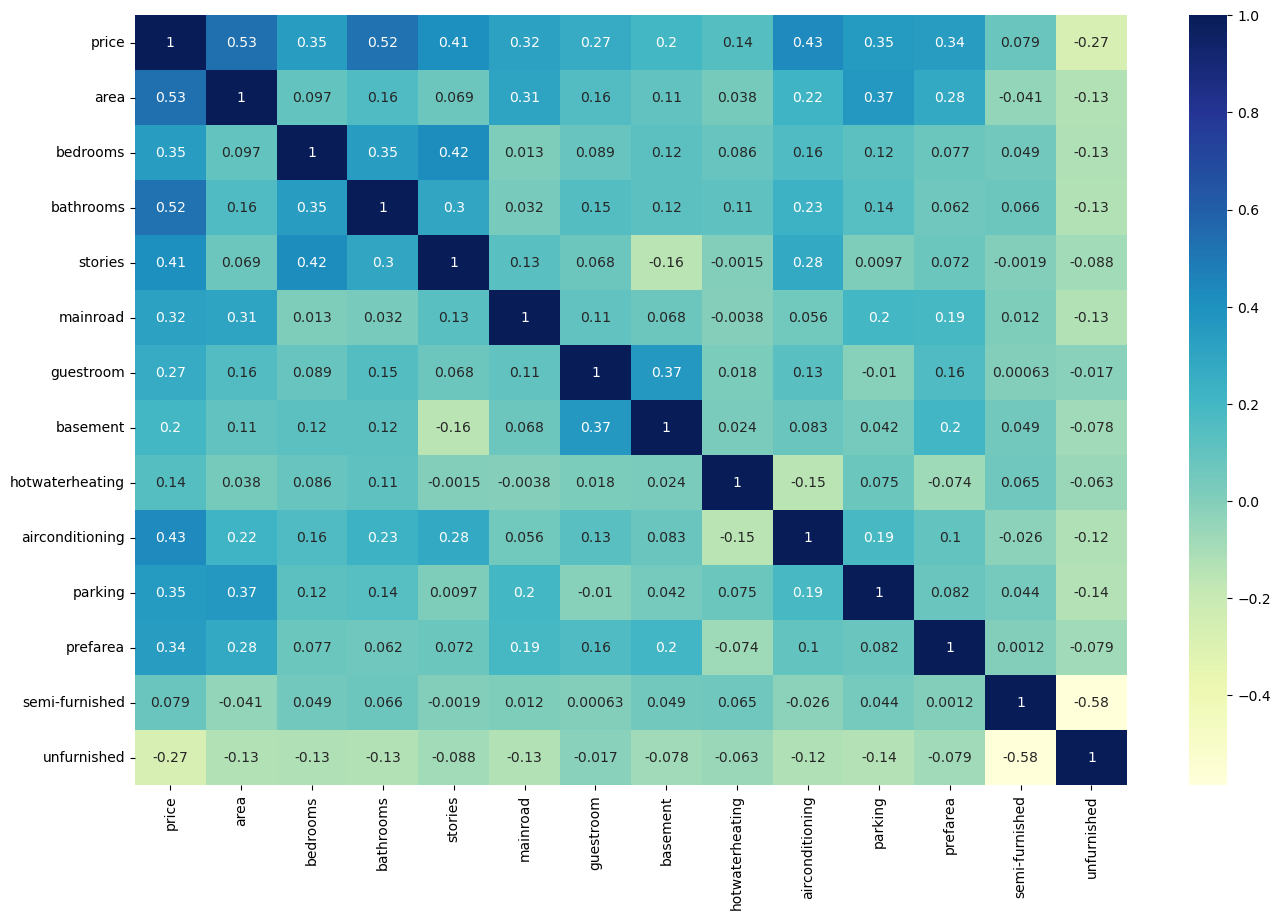

In [32]:
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

# Summary

Here we learned about Multiple Lieanr regression Overfitting, Multi-collinearity, Standardizing, Min Max Scaling and Feature Selection. Then we were given a dataset of Housing prices. Our task was to find out the most relevant factors affe cting house price and predict the price of the house. We imported the csv file and converted the object type attributes to numerical by using map() fucntion to map their unique values to a number. As most of the object attributes had values Yes or No, we assigned 1 to yes and 0 to no. Then a column named furnishingstatus had 3 values, furnished, semi-furnished and unfurnished. we created a dummy columns for them with values 1 for True and 0 for False. Then we deleted furnished column so as to use semi-furnished and unfurnished as two variables to define:

- 00 for furnished 
- 01 for unfurnished
- 10 for semi-furnished

We also plotted boxplot and heatmap for further understanding of the dataset.

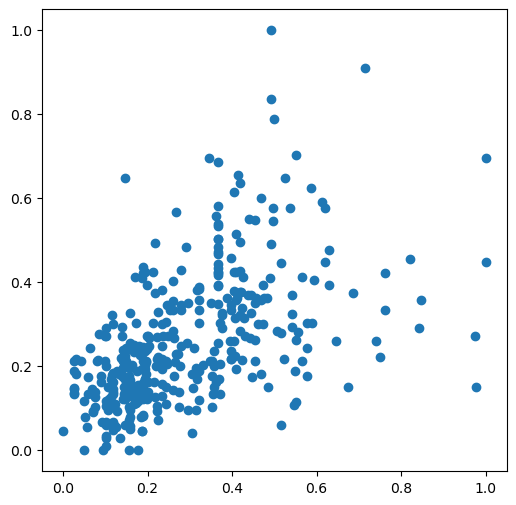

In [33]:
plt.figure(figsize=(6,6))
plt.scatter(df_train.area,df_train.price)
plt.show()

In [34]:
y_train= df_train.pop("price")
X_train=df_train

In [35]:
X_train.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [36]:
X_train.dtypes

area               float64
bedrooms           float64
bathrooms          float64
stories            float64
mainroad             int64
guestroom            int64
basement             int64
hotwaterheating      int64
airconditioning      int64
parking            float64
prefarea             int64
semi-furnished       int32
unfurnished          int32
dtype: object

In [37]:
y_train.dtypes

dtype('float64')

In [38]:
y_train

359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
         ...   
526    0.048485
53     0.484848
350    0.175758
79     0.424242
520    0.060606
Name: price, Length: 381, dtype: float64

In [39]:
import statsmodels.api as sm
#using sm.add_constant makes the model satt its value from an intercept, instead of origin

X_train_lm=sm.add_constant(X_train[["area"]])

lr=sm.OLS(y_train,X_train_lm).fit()

In [40]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           3.15e-29
Time:                        11:36:35   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
lr.params

const    0.126894
area     0.462192
dtype: float64

In [42]:
help(X_train.iloc)

Help on _iLocIndexer in module pandas.core.indexing object:

class _iLocIndexer(_LocationIndexer)
 |  Purely integer-location based indexing for selection by position.
 |  
 |  ``.iloc[]`` is primarily integer position based (from ``0`` to
 |  ``length-1`` of the axis), but may also be used with a boolean
 |  array.
 |  
 |  Allowed inputs are:
 |  
 |  - An integer, e.g. ``5``.
 |  - A list or array of integers, e.g. ``[4, 3, 0]``.
 |  - A slice object with ints, e.g. ``1:7``.
 |  - A boolean array.
 |  - A ``callable`` function with one argument (the calling Series or
 |    DataFrame) and that returns valid output for indexing (one of the above).
 |    This is useful in method chains, when you don't have a reference to the
 |    calling object, but would like to base your selection on some value.
 |  - A tuple of row and column indexes. The tuple elements consist of one of the
 |    above inputs, e.g. ``(0, 1)``.
 |  
 |  ``.iloc`` will raise ``IndexError`` if a requested indexer is


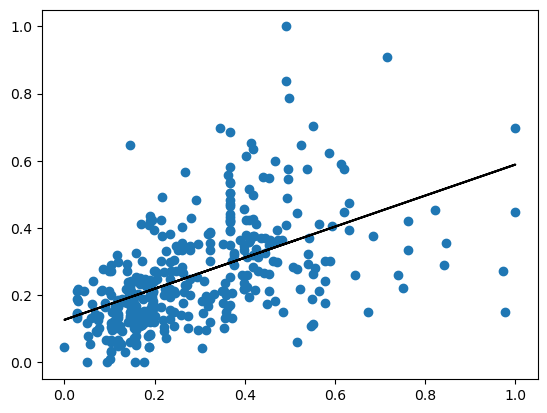

In [43]:
plt.scatter(X_train_lm.iloc[:, 1],y_train)
plt.plot(X_train_lm.iloc[:,1],0.127+0.462*X_train_lm.iloc[:,1],color="black")

ADD ANothe variable

In [44]:
X_train_lm=X_train[["area","bathrooms"]]

In [45]:
import statsmodels.api as sm
#using sm.add_constant makes the model satt its value from an intercept, instead of origin

X_train_lm=sm.add_constant(X_train_lm)

lr=sm.OLS(y_train,X_train_lm).fit()

In [46]:
lr.params

const        0.104589
area         0.398396
bathrooms    0.298374
dtype: float64

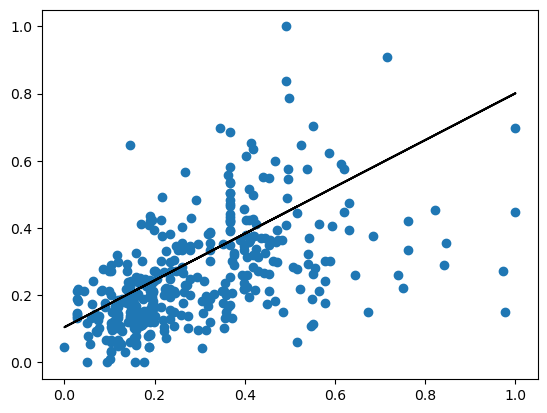

In [47]:
plt.scatter(X_train_lm.iloc[:, 1],y_train)
plt.plot(X_train_lm.iloc[:,1],0.105+0.398*X_train_lm.iloc[:,1]+0.298*X_train_lm.iloc[:,1],color="black")

In [48]:
X_train_lm=X_train[["area","bathrooms","bedrooms"]]

X_train_lm=sm.add_constant(X_train_lm)

lr=sm.OLS(y_train,X_train_lm).fit()

lr.params

const        0.041352
area         0.392211
bathrooms    0.259978
bedrooms     0.181863
dtype: float64

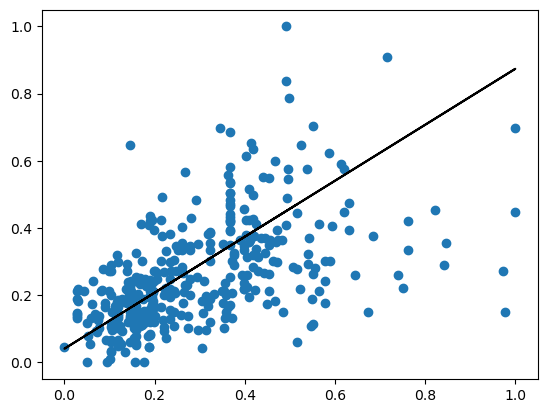

In [50]:
plt.scatter(X_train_lm.iloc[:, 1],y_train)
plt.plot(X_train_lm.iloc[:,1],0.041+0.392*X_train_lm.iloc[:,1]+0.259*X_train_lm.iloc[:,1]+0.182*X_train_lm.iloc[:,1],color="black")

In [51]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           3.12e-57
Time:                        11:37:08   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.022       0.006       0.077
area           0.3922      0.032     12.279      0.000       0.329       0.455
bathrooms      0.2600      0.026     10.033      0.000       0.209       0.311
bedrooms       0.1819      0.041      4.396      0.000       0.101       0.263
==============================================================================
Omnibus:                       50.037   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.806
Skew:                           0.648   Prob(JB):                     7.92e-28
Kurtosis:                       5.487   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
X_train_lm=X_train[["area","bathrooms","bedrooms","stories"]]

X_train_lm=sm.add_constant(X_train_lm)

lr=sm.OLS(y_train,X_train_lm).fit()

lr.params

const        0.046694
area         0.390871
bathrooms    0.232997
bedrooms     0.089656
stories      0.127895
dtype: float64

In [53]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     115.2
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           5.09e-64
Time:                        11:37:08   Log-Likelihood:                 316.23
No. Observations:                 381   AIC:                            -622.5
Df Residuals:                     376   BIC:                            -602.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0467      0.017      2.710      0.007       0.013       0.081
area           0.3909      0.030     12.827      0.000       0.331       0.451
bathrooms      0.2330      0.025      9.283      0.000       0.184       0.282
bedrooms       0.0897      0.042      2.125      0.034       0.007       0.173
stories        0.1279      0.021      6.187      0.000       0.087       0.169
==============================================================================
Omnibus:                       65.663   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.324
Skew:                           0.794   Prob(JB):                     7.74e-42
Kurtosis:                       6.067   Cond. No.                         9.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

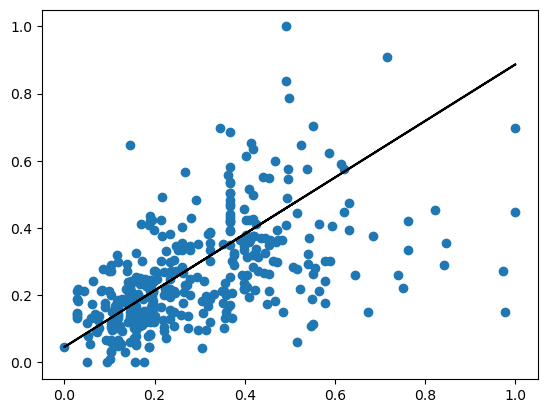

In [54]:
plt.scatter(X_train_lm.iloc[:, 1],y_train)
plt.plot(X_train_lm.iloc[:,1],0.046+0.391*X_train_lm.iloc[:,1]+0.233*X_train_lm.iloc[:,1]+0.089*X_train_lm.iloc[:,1]+0.128*X_train_lm.iloc[:,1],color="black")

In [55]:
lr_1.summary()

NameError: name 'lr_1' is not defined

In [56]:
X_train_new=X_train.drop(["semi-furnished"],axis=1)

In [57]:
X_train_lm=sm.add_constant(X_train_new)
lr_1=sm.OLS(y_train,X_train_lm).fit()
lr_1.params

const              0.020740
area               0.234404
bedrooms           0.046710
bathrooms          0.190876
stories            0.108475
mainroad           0.050401
guestroom          0.030447
basement           0.021605
hotwaterheating    0.084890
airconditioning    0.066803
parking            0.060761
prefarea           0.059419
unfurnished       -0.031594
dtype: float64

In [58]:
lr_1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           1.07e-83
Time:                        11:37:40   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019      1.098      0.273      -0.016       0.058
area                0.2344      0.030      7.845      0.000       0.176       0.293
bedrooms            0.0467      0.037      1.268      0.206      -0.026       0.119
bathrooms           0.1909      0.022      8.697      0.000       0.148       0.234
stories             0.1085      0.019      5.669      0.000       0.071       0.146
mainroad            0.0504      0.014      3.524      0.000       0.022       0.079
guestroom           0.0304      0.014      2.238      0.026       0.004       0.057
basement            0.0216      0.011      1.946      0.052      -0.000       0.043
hotwaterheating     0.0849      0.022      3.941      0.000       0.043       0.127
airconditioning     0.0668      0.011      5.923      0.000       0.045       0.089
parking             0.0608      0.018      3.372      0.001       0.025       0.096
prefarea            0.0594      0.012      5.046      0.000       0.036       0.083
unfurnished        -0.0316      0.010     -3.096      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       93.538   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.844
Skew:                           1.090   Prob(JB):                     1.05e-66
Kurtosis:                       6.794   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

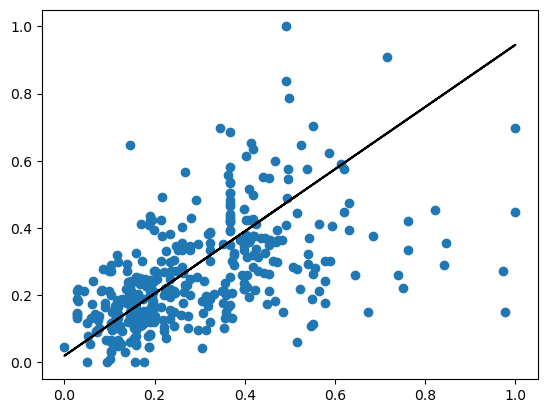

In [59]:
plt.scatter(X_train_lm.iloc[:, 1],y_train)
plt.plot(X_train_lm.iloc[:,1],
         0.02003+0.235*X_train_lm.iloc[:,1]+0.047*X_train_lm.iloc[:,1]+0.191*X_train_lm.iloc[:,1]
         +0.109*X_train_lm.iloc[:,1]+0.0504*X_train_lm.iloc[:,1]+0.0304*X_train_lm.iloc[:,1]
         +0.0216*X_train_lm.iloc[:,1]+0.0849*X_train_lm.iloc[:,1]+0.067*X_train_lm.iloc[:,1]
         +0.061*X_train_lm.iloc[:,1]+0.059*X_train_lm.iloc[:,1]
         -0.031*X_train_lm.iloc[:,1],color="black")

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Features"]=X_train_new.columns
vif["VIF"]=[variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.51
5,guestroom,1.47


In [61]:
X_train_new1=X_train_new.drop(["bedrooms"],axis=1)
X_train_lm=sm.add_constant(X_train_new1)
lr_1=sm.OLS(y_train,X_train_lm).fit()
lr_1.params

const              0.035722
area               0.234746
bathrooms          0.196480
stories            0.117751
mainroad           0.048798
guestroom          0.030097
basement           0.023917
hotwaterheating    0.086403
airconditioning    0.066533
parking            0.062872
prefarea           0.059643
unfurnished       -0.032317
dtype: float64

In [62]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           2.73e-84
Time:                        11:37:40   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015      2.421      0.016       0.007       0.065
area                0.2347      0.030      7.851      0.000       0.176       0.294
bathrooms           0.1965      0.022      9.132      0.000       0.154       0.239
stories             0.1178      0.018      6.654      0.000       0.083       0.153
mainroad            0.0488      0.014      3.423      0.001       0.021       0.077
guestroom           0.0301      0.014      2.211      0.028       0.003       0.057
basement            0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning     0.0665      0.011      5.895      0.000       0.044       0.089
parking             0.0629      0.018      3.501      0.001       0.028       0.098
prefarea            0.0596      0.012      5.061      0.000       0.036       0.083
unfurnished        -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
 vif=pd.DataFrame()
vif["Features"]=X_train_new1.columns
vif["VIF"]=[variance_inflation_factor(X_train_new1.values,i) for i in range(X_train_new1.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


In [64]:
y_train_price=lr_1.predict(X_train_lm)

Text(0.5, 0, 'Error')

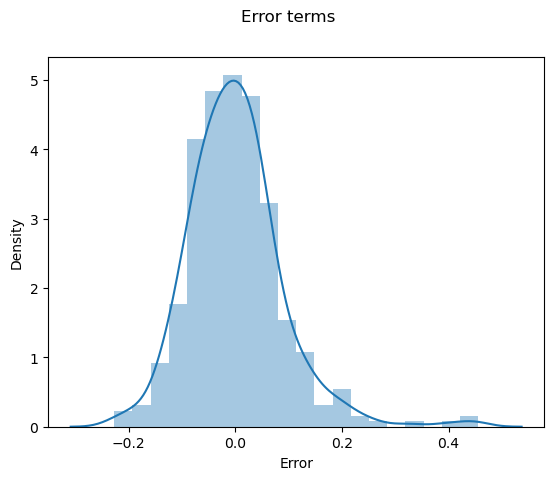

In [65]:
fig=plt.figure()
sns.distplot((y_train-y_train_price),bins=20)
fig.suptitle("Error terms")
plt.xlabel("Error")

In [66]:
y_train_price

359    0.109599
19     0.463835
159    0.330450
35     0.515631
28     0.468225
         ...   
526    0.079966
53     0.477416
350    0.263852
79     0.443907
520    0.173336
Length: 381, dtype: float64

# Making predictions

In [87]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,1.640000e+02,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,4.789686e+06,5228.695122,3.042683,1.317073,1.804878,0.865854,0.195122,0.347561,0.030488,0.353659,0.615854,0.237805,0.420732,0.329268
std,1.987485e+06,2408.283816,0.737685,0.562162,0.828022,0.341853,0.397508,0.477654,0.172452,0.479569,0.867967,0.427043,0.495189,0.471387
min,1.820000e+06,1650.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.395000e+06,3518.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.361000e+06,4787.500000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.757500e+06,6352.500000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.225000e+07,16200.000000,5.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000


In [88]:
num_vars=["area","bedrooms","bathrooms","stories","parking","price"]
df_test[num_vars]=scaler.transform(df_test[num_vars])

In [89]:
y_test=df_test.pop("price")
X_test=df_test

In [90]:
df_test.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268
std,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
y_test

265    0.229697
54     0.484848
171    0.303030
244    0.242424
268    0.227879
         ...   
413    0.145455
191    0.284848
310    0.206061
46     0.500000
50     0.490909
Name: price, Length: 164, dtype: float64

In [70]:
from sklearn.metrics import r2_score

In [71]:
X_test_new=X_test[X_train_new1.columns]
X_test_new=sm.add_constant(X_test_new)
y_pred=lr_1.predict(X_test_new)

In [72]:
print(r2_score(y_true=y_test,y_pred=y_pred))

0.6713505684480789


In [73]:
lr_1.params 

const              0.035722
area               0.234746
bathrooms          0.196480
stories            0.117751
mainroad           0.048798
guestroom          0.030097
basement           0.023917
hotwaterheating    0.086403
airconditioning    0.066533
parking            0.062872
prefarea           0.059643
unfurnished       -0.032317
dtype: float64

Text(0, 0.5, 'y_pred')

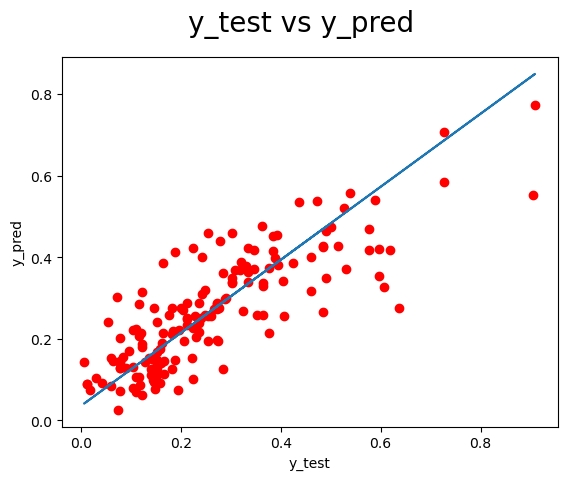

In [99]:
fig=plt.figure()
plt.scatter(y_test,y_pred,color="red")
plt.plot(y_test,0.0357+0.235*y_test+0.196*y_test+0.1178*y_test+0.0488*y_test+0.0301*y_test+0.024*y_test+0.086*y_test+0.067*y_test+0.063*y_test+0.0596*y_test-0.0323*y_test)
fig.suptitle("y_test vs y_pred",fontsize=20)
plt.xlabel("y_test")
plt.ylabel("y_pred")

Text(0, 0.5, 'y_pred')

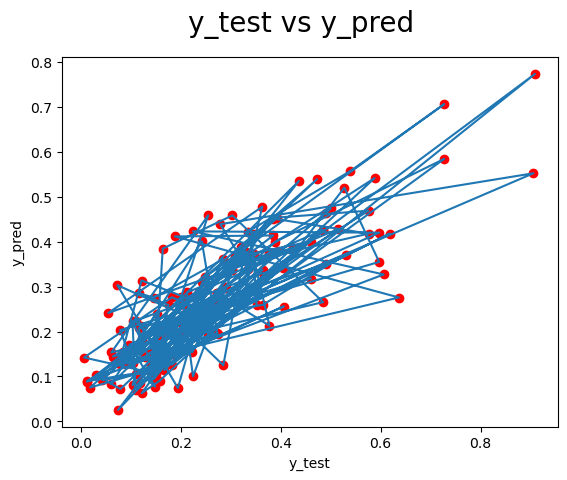

In [100]:
fig=plt.figure()
plt.scatter(y_test,y_pred,color="red")
plt.plot(y_test,0.0357+0.235*X_test_new["area"]+0.196*X_test_new["bathrooms"]+0.1178*X_test_new["stories"]+0.0488*X_test_new["mainroad"]+0.0301*X_test_new["guestroom"]+0.024*X_test_new["basement"]+0.086*X_test_new["hotwaterheating"]+0.067*X_test_new["airconditioning"]+0.063*X_test_new["parking"]+0.0596*X_test_new["prefarea"]-0.0323*X_test_new["unfurnished"])
fig.suptitle("y_test vs y_pred",fontsize=20)
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [ ]:
X_train_lm

In [ ]:
X_train_new